# Estatística III

# Análise exploratória de dados

Surgida por volta de 1977 por john wilder turkey

Busca obter informações ocultas nos dados

- Variação
- Anomalias
- Distribuição
- Tendências
- Padrões
- Relações

> Sempre iniciar um projeto pela análise exploratória

EDA não é ficar plotando gráfico, mas usa plots intensivamente


# Distribuição de Poisson

Mede probabilidade no tempo, ao invés de número de experimentos.

Os intervalos devem ser independentes

$$ P(X = x) = e^{-\lambda} \cdot \frac{\lambda^x}{x!}$$

Onde:

x é o número de eventos

$\lambda$ = número médio de eventos por intervalo

### Exemplo

Ocorrem em média 2 acidentes por dia em um local. Qual a chance de ocorrerem 3?

$$ P(X = 3) = e^{-2} \cdot \frac{2^3}{3!} = 0.1804 = 18.04\%$$

Qual a probabilidade de ocorrerem 3 ou menos? 

Tem que fazer a probabilidade pra $X = [3,2,1,0]$

Qual a probabilidade de ocorrerem 3 ou mais?

Complementar de ocorrerem 3 ou menos

In [12]:
# Distribuição de poisson
from scipy.stats import poisson

exact_3 = poisson.pmf(3,2)
print(f'{exact_3=:.2%}')

less_3 = poisson.cdf(3,2)
print(f'{less_3=:.2%}')

more_3 = poisson.sf(3,2)
print(f'{more_3=:.2%}')

exact_3=18.04%
less_3=85.71%
more_3=14.29%


# Qui quadrado

Eu não entendi nada disso

# Teste t de student

É um teste de hipótese usado para separar dois grupos e/ou duas médias. Para esse teste:

- As populações devem ser independentes
- A variável dependente é normalmente distribuída
- Variância das duas variáveis é aproximada
  
# Análise de variância (Anova)

Com 3 grupos, não dá pra usar t de student, por isso existe a Anova. É basicamente a mesma coisa da t de student, porém olha a variação dentro dos grupos. Ela olha o conjunto completo.

- Possui uma variável quantitativa e várias categóricas.

### Exemplo

Supondo que hajam 2 remédios com diferentes tempos para "curar" determinada doença e que o remédio A seja 20% mais caro que o remédio B.

- $H_0$: não há diferença no tempo de cura entre os remédios
- $H_a$: há diferença verdadeira no tempo de cura entre os remédios

Se fossem apenas 2 remédios seria só usar a distribuição t de student mas se houvessem mais remédios as comparações aumentam muito e ficam inviáveis.

#### Teste F

- $F(X,Y)$: 
  - X -> graus de liberdade (n_grupos -1)
  - Y -> graus de liberdade no denominador (n_obs - n_grupos)

Lembrando que na hipótese alternativa $H_a$: há diferença verdadeira no tempo de cura entre os remédios:

$valor - p < \alpha$: há variação significativa


# Outliers

Valores fora do esperado, apenas.  Dá pra contornar o problema de 3 formas, mas não há receita universal para isso:

- Fazer nada
- Substituir
- Remover

outliers=    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
15  16            5.7           4.4            1.5           0.4   
32  33            5.2           4.1            1.5           0.1   
33  34            5.5           4.2            1.4           0.2   
60  61            5.0           2.0            3.5           1.0   

            Species  
15      Iris-setosa  
32      Iris-setosa  
33      Iris-setosa  
60  Iris-versicolor  
predict=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


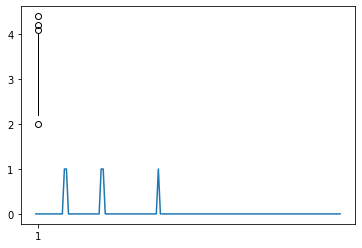

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from pyod.models.knn import KNN

df = pd.read_csv('datasets/Iris.csv')

plt.boxplot(df.iloc[:,2])

#olhando no gráfico
outliers = df[(df['SepalWidthCm'] > 4) | (df['SepalWidthCm'] < 2.2)]
print(f'{outliers=}')

#fazendo do jeito certo

sepal_width = df.iloc[:, 2].values
sepal_width = sepal_width.reshape(-1, 1)

detector = KNN()
detector.fit(sepal_width)

predict = detector.labels_

plt.plot(predict)
print(f'{predict=}')